# 2023年度 実世界情報実験1 画像処理テーマ


## 第３課題ファイル

このノートではOpenCVのさまざまな画像処理関数について学ぶ。

### 補足
高度な画像処理を行う場合、画像の解像度が高いと実行する際
非常に長い時間や大量のメモリを要する場合がある。
また、提出時のファイルサイズが非常に大きくなることもある。

特に自分で撮影した画像を用いる場合、必要以上に高い解像度
となる場合があるので
必要に応じて縮小した画像を用いて実験を行うとよい。
OpenCVの `cv2.resize()` 関数を用いると簡単に縮小することが
できる。

[OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 » 画像の幾何変換 » スケーリング(拡大・縮小)](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#id4)
の項を参考にすればよい。

In [ ]:
# 画像の縮小の例
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('lena.jpg')
height, width = img.shape[:2]
# 画像の縦横サイズをそれぞれ半分にする
reduced_img = cv2.resize(img,(width//2, height//2), interpolation = cv2.INTER_CUBIC)
cv2.imwrite('reduced_lena.png', reduced_img)
plt.imshow(cv2.cvtColor(reduced_img,cv2.COLOR_BGR2RGB))

## 画像の平滑化
- [OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 » 画像の平滑化](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_filtering/py_filtering.html)

画像の画素には熱ノイズをはじめとする
ノイズが加わっている。
これを滑らかにするために近傍の画素との
平均（あるいは重み付け平均）を取って
置き換える「平滑化」の処理を加えることが
多い。
この平滑化処理のうち、チュートリアルにある
ガウシアンフィルタ、メディアンフィルタを
試してみよ。
その際、画像がぼやけて、領域の境界線が
あいまいになることを確認すること。

### 課題 3-1
配布しているzipファイル内の画像とは異なる画像を用意し
その画像にガウシアンフィルタを適用した画像と
メディアンフィルタを適用した画像をそれぞれ生成して、
元の画像と並べて表示せよ。
使用する画像としては2つのフィルタの適用結果が
なるべく異なるように選ぶこと。
フィルタを適用するのはカラー画像でもそれを濃淡化した
画像でもどちらでも良い。

プログラムコードだけでなく、元となった画像と生成結果の画像も画像ファイルとして提出すること。
元画像のファイル名は `lesson3-1-input.png`
（JPEGファイルであれば `lesson3-1-input.jpg` など）とし、
結果のファイル名は `lesson3-1-gaussian.png`, `lesson3-1-median.png` とすること。

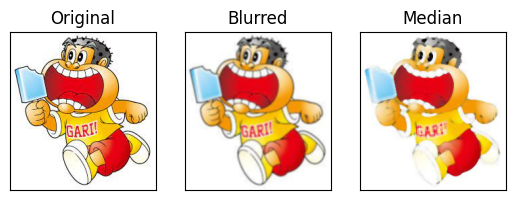

True

In [37]:
# 課題 3-1 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('lesson3-1-input.jpg')

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

blur = cv2.GaussianBlur(img,(5,5),0)
median = cv2.medianBlur(img,5)

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()


blur=cv2.cvtColor(blur,cv2.COLOR_BGR2RGB)
median=cv2.cvtColor(median,cv2.COLOR_BGR2RGB)
cv2.imwrite("lesson3-1-gaussian.png",blur)
cv2.imwrite("lesson3-1-median.png",median)

### 発展課題 3-A
バイラテラルフィルタをためして、ガウシアンフィルタやメディアンフィルタとなにが異なるのか結果を比較、考察せよ。

考察は「発展課題 3-A 考察」のテキストセルに記入すること。

バイラテラルフィルタについては
[こちら](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_filtering/py_filtering.html#id7)
が参考になる。

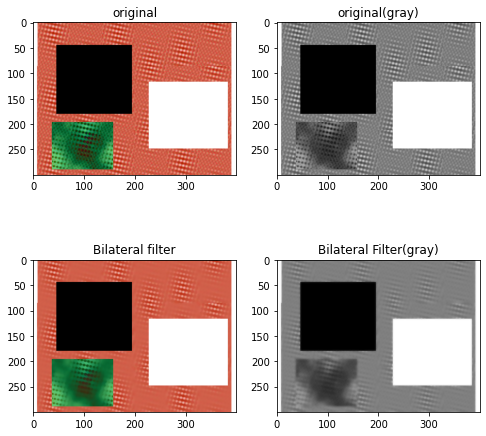

In [ ]:
# 発展課題 3-A code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

# pic4.png from https://github.com/opencv/opencv/tree/master/samples/data
img = cv2.imread('pic4.png')




#### 発展課題 3-A 文章解答欄
（この部分をダブルクリックで編集開始）

## モルフォロジー変換
参考サイト: [OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 » モルフォロジー変換](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html)

モルフォロジー変換は、二値画像（0/1の画像）に対する変換処理である。領域膨張や収縮が代表的な例である。

### 課題 3-2
配布しているzipファイル内の画像とは異なる画像を用意して
その画像を二値化し、得られた二値画像に対して
膨張処理を行った結果と収縮処理を行った結果をそれぞれ作成し、
元の画像、二値画像とそれぞれの結果を並べて表示せよ。

プログラムコードだけでなく、元となった画像と
生成結果の画像(二値画像も含む)も画像ファイルとして
提出すること。
元画像のファイル名は `lesson3-2-input.png`
（JPEGファイルであれば `lesson3-2-input.jpg` など）とし、
結果のファイル名は `lesson3-2-binary.png`,
`lesson3-2-dilate.png`, `lesson3-2-erode.png` とすること。

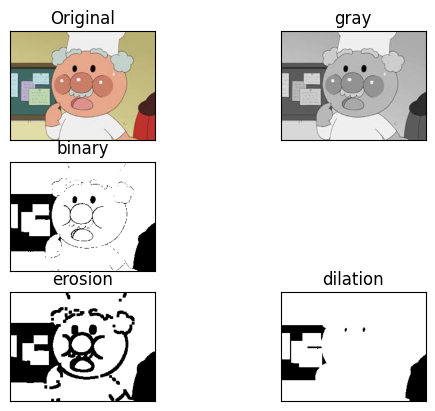

True

In [5]:
# 課題 3-2 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('lesson3-2-input.jpg')
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img = cv2.imread('lesson3-2-input.jpg',0)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(thresh1,kernel,iterations = 1)
dilation = cv2.dilate(thresh1,kernel,iterations = 1)


plt.subplot(321),plt.imshow(img_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(img,'gray'),plt.title('gray')
plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(thresh1,'gray'),plt.title('binary')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(erosion,'gray'),plt.title('erosion')
plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(dilation,'gray'),plt.title('dilation')
plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite("lesson3-2-binary.png",thresh1)
cv2.imwrite("lesson3-2-erode.png",erosion)
cv2.imwrite("lesson3-2-dilate.png",dilation)

## 画像の勾配（コントラスト、エッジ抽出）
参考サイト: [OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 » 画像の勾配](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_gradients/py_gradients.html)

エッジとは画像のなかで明るさの大きく変化している場所（画素）のことである。
エッジを求める処理をエッジ抽出という。
これにより画像中に含まれる物体の輪郭など、画像を分析するのに
有用な特徴を抽出、強調することができる。

SobelのオペレータとLaplaceのオペレータ（Laplacian)の2つについてエッジ画像を
抽出してみる。
Sobelのオペレータは縦方向と横方向の2種類がある。それぞれ横線と縦線がエッジとして抽出される。
縦エッジと横エッジ合計2枚の画像ができるのでそれを表示してみるとよい。もし縦でも横でも強いエッジ（どの方向でもいいので変化の大きい部分）を出すには勾配の大きさを抽出すればよい。

縦エッジ画像$I_x(x,y)$、横エッジ画像$I_y(x,y)$としたとき画素$(x,y)$の勾配の大きさは$\sqrt{I_x(x,y)^2+I_y(x,y)^2}$で求められる。

Sobelは一階微分$\left(\frac{\partial I}{\partial x},\frac{\partial I}{\partial y}\right)$、を求めるが、Laplacianは二階微分$\left(\frac{\partial^2 I}{\partial x^2}+\frac{\partial^2 I}{\partial y^2}\right)$を求めている。


### 課題 3-3
配布しているzipファイル内の画像とは異なる画像を用意し、
それを濃淡画像化したものに対してSobelオペレータを施したエッジ画像（縦エッジ、横エッジ、勾配の大きさ）を生成し、元の画像と並べて表示せよ。
ラプラシアンについても生成して元の画像と並べて表示せよ。
さらに、縦方向と横方向のSobelオペレータの適用結果と
ラプラシアンの適用結果について絶対値を取った画像も
表示すること。

用いる画像を選ぶ際にはSobelオペレータやLaplacianを
適用した結果の画像でエッジ部分が目立つようなものを選ぶこと。
また、プログラムコードだけでなく元となった画像もファイル
として提出すること。元画像のファイル名は `lesson3-3-input.png`
（JPEGファイルであれば `lesson3-3-input.jpg` など）
とすること。

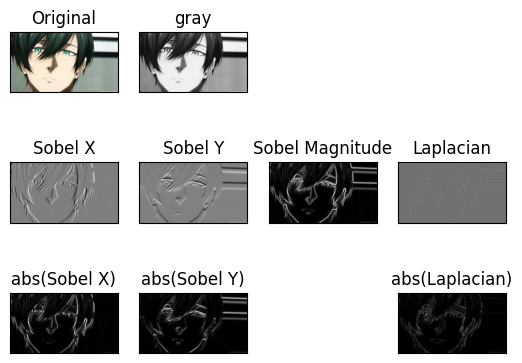

In [8]:
# 課題 3-3 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('lesson3-3-input.jpg')
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img = cv2.imread('lesson3-3-input.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
magnitude = np.sqrt(np.square(sobelx) + np.square(sobely))

abs_laplacian64f = np.absolute(laplacian)
abs_sobelx64f = np.absolute(sobelx)
abs_sobely64f = np.absolute(sobely)

plt.subplot(3,4,1),plt.imshow(img_rgb)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,2),plt.imshow(img,cmap = 'gray')
plt.title('gray'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,5),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,6),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,7),plt.imshow(magnitude,cmap = 'gray')
plt.title('Sobel Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,8),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,9),plt.imshow(abs_sobelx64f,cmap = 'gray')
plt.title('abs(Sobel X)'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,10),plt.imshow(abs_sobely64f,cmap = 'gray')
plt.title('abs(Sobel Y)'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,12),plt.imshow(abs_laplacian64f,cmap = 'gray')
plt.title('abs(Laplacian)'), plt.xticks([]), plt.yticks([])

plt.show()


### 課題 3-4
課題3-3において、画素値の型を `uint8` としたままエッジ画像を求めるとうまくエッジが抽出できないことがある。
これはなぜか。チュートリアルページの最後の課題を参考に理由を考察し、どのような操作をしなければならないか記述せよ。

下記の「文章解答欄」のテキストセル内に記述すること。

#### 課題 3-4 文章解答欄
黒から白への変化は正方向の傾きとして計算されますが，白から黒への変化は負の傾きとして計算されます．そのため，勾配を np.uint8 へ変換すると，負の値は全て0になってしまいます．正負両方のエッジを検出したい場合は，画素値の型を cv2.CV_16S や cv2.CV_64F といったより高次のものに変更する必要がある.

## 二値画像内連結領域の輪郭と特徴
参考サイト: [OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 » OpenCVにおける輪郭(領域)](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_contours/py_table_of_contents_contours/py_table_of_contents_contours.html)

閾値処理によって二値化された画像の連結領域は、その輪郭(contour)で特徴づけられる。
輪郭ごとの「面積」「モーメント」「凸包」を計算することがOpenCVでは簡単にできる。チュートリアルを参考に輪郭の抽出と特徴の計算・表示を実行せよ。

但し、上記サイトのチュートリアルのコードは
Python 2.x系の環境でOpenCV 2.x系のライブラリを利用する
ことを想定しているようである。
そのため、現在のGoogle Colaboratoryのデフォルトの環境(OpenCV 4.1.2)
でそのまま実行しても期待通りに動作しない、あるいは
エラーが起こる可能性がある。
その場合は期待通りに動かないコードを精査し適宜変更すること。
特に、関数によってはライブラリのバージョンアップの際に
引数や返り値などの仕様が変更されている可能性もあるので
注意が必要である。

>ヒント
>
>OpenCV 4.1.2での関数の引数の詳細については
[OpenCV 4.1.2のリファレンスマニュアル](https://docs.opencv.org/4.1.2/)
を参照するとよい。

### 課題 3-5
配布しているzipファイル内の画像とは異なる画像で
適当な図形を含む画像を用意しそれを二値化した画像から
連結領域を見つけ出してその輪郭を図示せよ。
但し元画像としては分かりやすい連結領域が少なくとも
3つは現れるような画像を用い、それらの連結領域
それぞれについて輪郭を図示すること。
プログラムコードだけでなく、元となった画像もファイルとして提出すること。
元画像のファイル名は `lesson3-5-input.png`
（JPEGファイルであれば `lesson3-5-input.jpg` など）
とすること。

(Text(0.5, 1.0, 'contours[2]'), ([], []), ([], []))

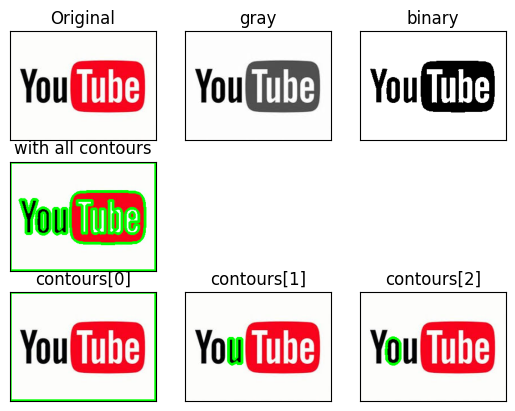

In [36]:
# 課題 3-5 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('lesson3-5-input.jpg')
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_gray = cv2.imread('lesson3-5-input.jpg',0)

ret,thresh = cv2.threshold(img_gray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

img=img_rgb.copy()
img0=img_rgb.copy()
img1=img_rgb.copy()
img2=img_rgb.copy()

cv2.drawContours(img, contours, -1, (0,255,0), 3)
cnt = contours[0]
cv2.drawContours(img0, [cnt], 0, (0,255,0), 3)
cnt1 = contours[1]
cv2.drawContours(img1, [cnt1], 0, (0,255,0), 3)
cnt2 = contours[2]
cv2.drawContours(img2, [cnt2], 0, (0,255,0), 3)

plt.subplot(3,3,1),plt.imshow(img_rgb)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,2),plt.imshow(img_gray,cmap='gray',vmin=0,vmax=255)
plt.title('gray'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,3),plt.imshow(thresh,cmap='gray')
plt.title('binary'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,4),plt.imshow(img)
plt.title('with all contours'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,7),plt.imshow(img0)
plt.title('contours[0]'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,8),plt.imshow(img1)
plt.title('contours[1]'), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,9),plt.imshow(img2)
plt.title('contours[2]'), plt.xticks([]), plt.yticks([])

### 課題 3-6
課題3-5のプログラムをもとに、得られた連結領域のそれぞれについて
輪郭だけでなく凸包と外接矩形も図示し、さらに
面積と周囲長とモーメントを数値として表示する
プログラムを作成せよ。

少なくとも3つの連結領域について図示すること。
図示する連結領域として課題3-5とは別のものを
選択しても構わない。


contours[0]のモーメント:{'m00': 49987.0, 'm10': 6473316.5, 'm01': 4823745.5, 'm20': 1117725982.3333333, 'm11': 624675042.25, 'm02': 620655254.3333333, 'm30': 217118272068.25, 'm21': 107860557295.16667, 'm12': 80374855436.16667, 'm03': 89839848064.75, 'mu20': 279431495.58333325, 'mu11': 0.0, 'mu02': 155163813.58333325, 'mu30': 3.0517578125e-05, 'mu21': 1.1444091796875e-05, 'mu12': 1.52587890625e-05, 'mu03': 3.0517578125e-05, 'nu20': 0.11183074265975816, 'nu11': 0.0, 'nu02': 0.06209781209781206, 'nu30': 5.462700398584655e-17, 'nu21': 2.0485126494692457e-17, 'nu12': 2.7313501992923275e-17, 'nu03': 5.462700398584655e-17}
contours[0]の面積:49987.0
contours[0]の周囲長:904.0
contours[1]のモーメント:{'m00': 848.0, 'm10': 75502.16666666666, 'm01': 89356.33333333333, 'm20': 6772763.833333333, 'm11': 7956375.5, 'm02': 9563171.666666666, 'm30': 611989673.15, 'm21': 713701142.7833333, 'm12': 851566826.2166667, 'm03': 1038628779.1, 'mu20': 50385.093520703726, 'mu11': 483.0801231665537, 'mu02': 147423.66339098476, 'mu3

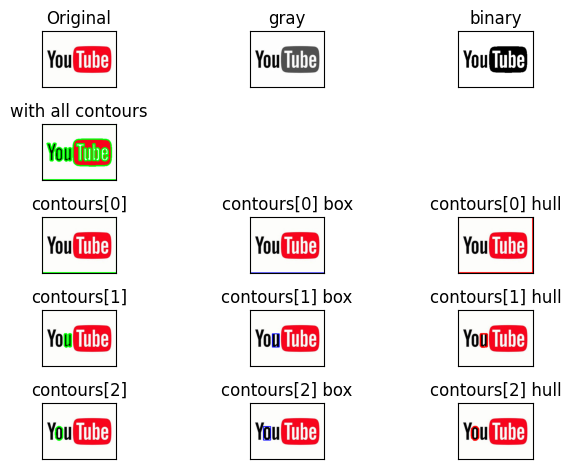

In [27]:
# 課題 3-6 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('lesson3-5-input.jpg')
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_gray = cv2.imread('lesson3-5-input.jpg',0)

ret,thresh = cv2.threshold(img_gray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

img=img_rgb.copy()
img0=img_rgb.copy()
img1=img_rgb.copy()
img2=img_rgb.copy()

img0_box=img_rgb.copy()
img1_box=img_rgb.copy()
img2_box=img_rgb.copy()

img0_hull=img_rgb.copy()
img1_hull=img_rgb.copy()
img2_hull=img_rgb.copy()

cv2.drawContours(img, contours, -1, (0,255,0), 3)

cnt = contours[0]
hull = cv2.convexHull(cnt)
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
M = cv2.moments(cnt)
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
print("contours[0]のモーメント:"+str(M))
print("contours[0]の面積:"+str(area))
print("contours[0]の周囲長:"+str(perimeter))
cv2.drawContours(img0_box,[box],0,(0,0,255),2)
cv2.drawContours(img0, [cnt], 0, (0,255,0), 3)
cv2.drawContours(img0_hull, [hull], 0, (255,0,0), 3)

cnt1 = contours[1]
hull1= cv2.convexHull(cnt1)
rect1 = cv2.minAreaRect(cnt1)
box1 = cv2.boxPoints(rect1)
box1 = np.int0(box1)
M1 = cv2.moments(cnt1)
area1 = cv2.contourArea(cnt1)
perimeter1 = cv2.arcLength(cnt1,True)
print("contours[1]のモーメント:"+str(M1))
print("contours[1]の面積:"+str(area1))
print("contours[1]の周囲長:"+str(perimeter1))
cv2.drawContours(img1_box,[box1],0,(0,0,255),2)
cv2.drawContours(img1, [cnt1], 0, (0,255,0), 3)
cv2.drawContours(img1_hull, [hull1], 0, (255,0,0), 3)

cnt2 = contours[2]
hull2= cv2.convexHull(cnt2)
rect2 = cv2.minAreaRect(cnt2)
box2 = cv2.boxPoints(rect2)
box2 = np.int0(box2)
M2 = cv2.moments(cnt2)
area2 = cv2.contourArea(cnt2)
perimeter2 = cv2.arcLength(cnt2,True)
print("contours[2]のモーメント:"+str(M2))
print("contours[2]の面積:"+str(area2))
print("contours[2]の周囲長:"+str(perimeter2))
cv2.drawContours(img2_box,[box2],0,(0,0,255),2)
cv2.drawContours(img2, [cnt2], 0, (0,255,0), 3)
cv2.drawContours(img2_hull, [hull2], 0, (255,0,0), 3)

plt.subplot(5,3,1),plt.imshow(img_rgb)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(5,3,2),plt.imshow(img_gray,cmap='gray',vmin=0,vmax=255)
plt.title('gray'), plt.xticks([]), plt.yticks([])
plt.subplot(5,3,3),plt.imshow(thresh,cmap='gray')
plt.title('binary'), plt.xticks([]), plt.yticks([])
plt.subplot(5,3,4),plt.imshow(img)
plt.title('with all contours'), plt.xticks([]), plt.yticks([])
plt.subplot(5,3,7),plt.imshow(img0)
plt.title('contours[0]'), plt.xticks([]), plt.yticks([])
plt.subplot(5,3,8),plt.imshow(img0_box)
plt.title('contours[0] box'), plt.xticks([]), plt.yticks([])
plt.subplot(5,3,9),plt.imshow(img0_hull)
plt.title('contours[0] hull'), plt.xticks([]), plt.yticks([])
plt.subplot(5,3,10),plt.imshow(img1)
plt.title('contours[1]'), plt.xticks([]), plt.yticks([])


plt.subplot(5,3,11),plt.imshow(img1_box)
plt.title('contours[1] box'), plt.xticks([]), plt.yticks([])
plt.subplot(5,3,12),plt.imshow(img1_hull)
plt.title('contours[1] hull'), plt.xticks([]), plt.yticks([])
plt.subplot(5,3,13),plt.imshow(img2)
plt.title('contours[2]'), plt.xticks([]), plt.yticks([])
plt.subplot(5,3,14),plt.imshow(img2_box)
plt.title('contours[2] box'), plt.xticks([]), plt.yticks([])
plt.subplot(5,3,15),plt.imshow(img2_hull)
plt.title('contours[2] hull'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

## ヒストグラム
参考サイト: [OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 » OpenCVでのヒストグラム](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html)
- [概念と計算方法](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html)
- [ヒストグラム平坦化(histogram equalization)](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html)

ヒストグラムは度数分布である。
画像の場合、画素の値（明るさ、色、コントラストなどを表す）のヒストグラムを
求めることがよくある。
例えば色のヒストグラムを見ることで赤い領域の多い画像であることがわかり、見やすくするための色変換に活用できたりする。
チュートリアルを参考に画素値のヒストグラムを表示する方法を学ぶ。


### 課題 3-7
配布しているzipファイル内の画像とは異なる画像を用意し、
それをグレイスケール化した
画像について各画素の明るさのヒストグラムを作成し表示せよ。
同様に、画像のR成分、G成分、B成分のそれぞれを抽出した
グレイスケール画像を表示し、それらについても
ヒストグラムを作成し表示せよ。
各グラフが明るさ、R成分、G成分、B成分のどれに
対応しているのか分かりやすいよう配置すること。
（画像やグラフに `matplotlib.pyplot.title()` 関数で
タイトルをつけると良い）

プログラムコードだけでなく、元となった画像もファイルとして提出すること。
元画像のファイル名は `lesson3-7-input.png`
（JPEGファイルであれば `lesson3-7-input.jpg` など）
とすること。
> ヒント
>
> グラフの表示方法についてはチュートリアルや
> Matplotlibの [`matplotlib.pyplot.hist` 関数のマニュアル](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html が参考になる。


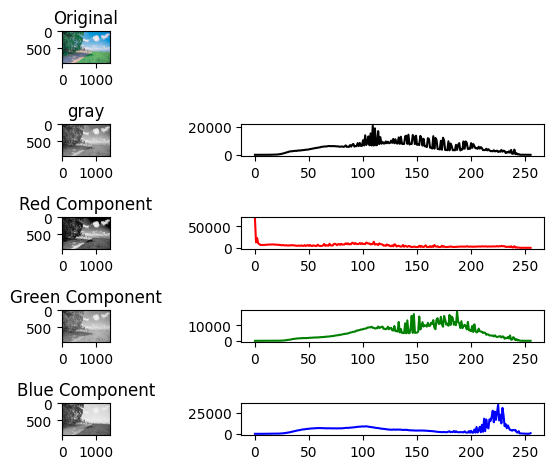

In [40]:
# 課題 3-7 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('lesson3-7-input.jpg')
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_gray = cv2.imread('lesson3-7-input.jpg',0)

hist_gray = cv2.calcHist([img_gray],[0],None,[256],[0,256])
hist_r = cv2.calcHist([img_rgb],[0],None,[256],[0,256])
hist_g = cv2.calcHist([img_rgb],[1],None,[256],[0,256])
hist_b = cv2.calcHist([img_rgb],[2],None,[256],[0,256])
"""
# グレースケール画像のヒストグラム
plt.hist(img_gray.ravel(), bins=256, range=[0, 256])
plt.title("Grayscale Histogram")
plt.show()
"""
# R成分抽出
r_channel = img_rgb[:, :, 0]

# G成分抽出
g_channel = img_rgb[:, :, 1]

# B成分抽出
b_channel = img_rgb[:, :, 2]

#元の画像
plt.subplot(5,2,1),plt.imshow(img_rgb)
plt.title('Original')
# グレースケール画像とヒストグラム
plt.subplot(5,2,3),plt.imshow(img_gray,cmap='gray',vmin=0,vmax=255)
plt.title('gray')
plt.subplot(5,2,4)
plt.plot(hist_gray, color='black')
# R成分画像とヒストグラム
plt.subplot(5, 2, 5)
plt.imshow(r_channel, cmap='gray')
plt.title('Red Component')
plt.subplot(5, 2, 6)
plt.plot(hist_r, color='red')
# G成分画像とヒストグラム
plt.subplot(5, 2, 7)
plt.imshow(g_channel, cmap='gray')
plt.title('Green Component')
plt.subplot(5, 2, 8)
plt.plot(hist_g, color='green')
# B成分画像とヒストグラム
plt.subplot(5, 2, 9)
plt.imshow(b_channel, cmap='gray')
plt.title('Blue Component')
plt.subplot(5, 2, 10)
plt.plot(hist_b, color='blue')

plt.tight_layout()
plt.show()

### 課題 3-8
チュートリアルその２にあるヒストグラム平坦化の処理を行って、低いコントラストの画像を鮮明化してみよ。
実行例では下記の画像に適用して鮮明化した画像を生成している。
この画像とも配布しているzipファイル内の画像とも異なる画像で
鮮明化の効果が分かりやすい画像を用意し、
それに対して鮮明化を行うこと。

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Low_visibility_due_to_Smog_in_entry_of_Chelmsford_Road_New_Delhi_31st_Dec_2017_9AM_DSCN8819_1.jpg/800px-Low_visibility_due_to_Smog_in_entry_of_Chelmsford_Road_New_Delhi_31st_Dec_2017_9AM_DSCN8819_1.jpg" width=300px>

[Wikimedia Commonsより](https://commons.wikimedia.org/wiki/File:Low_visibility_due_to_Smog_in_entry_of_Chelmsford_Road_New_Delhi_31st_Dec_2017_9AM_DSCN8819_1.jpg)

プログラムコードだけでなく、元となった画像と生成結果の画像も画像ファイルとして提出すること。
元画像のファイル名は `lesson3-8-input.png`
（JPEGファイルであれば `lesson3-8-input.jpg` など）とし、
結果のファイル名は `lesson3-8.png` とすること。

True

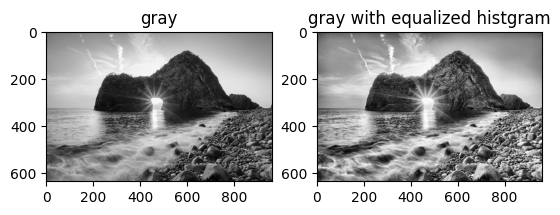

In [8]:
# 課題 3-8 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lesson3-8-input.jpg',0)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

plt.subplot(1,2,1),plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.title('gray')
plt.subplot(1,2,2),plt.imshow(cl1,cmap='gray')
plt.title('gray with equalized histgram')
cv2.imwrite('lesson3-8.png',cl1)

### 課題 3-9
ヒストグラム平坦化について「どういう処理であるか」と
「どのような活用法があるか」について述べよ。

下記の「文章解答欄」のテキストセル内に記述すること。

#### 課題 3-9 文章解答欄

##### どういう処理であるか
ヒストグラム平坦化とは、画素値のヒストグラムが全体的にたいらになるように濃度変換する処理である。

##### どのような活用法があるか
見にくい画像(コントラストの低い画像)をヒストグラム化すると、画素値がある範囲に集まっている。
このピーク領域を全体的にたいらになるように調整すると、見やすい画像(コントラストの高い画像)になる。